<a href="https://colab.research.google.com/github/mcx2576/workshop/blob/main/Data_Validation_Packages_answers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Welcome to our first pilot of the ING Code Breakfast Sessions!
18-12-2020 - Alexandru Coser, Cecilia Miao, Santiago Gil

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

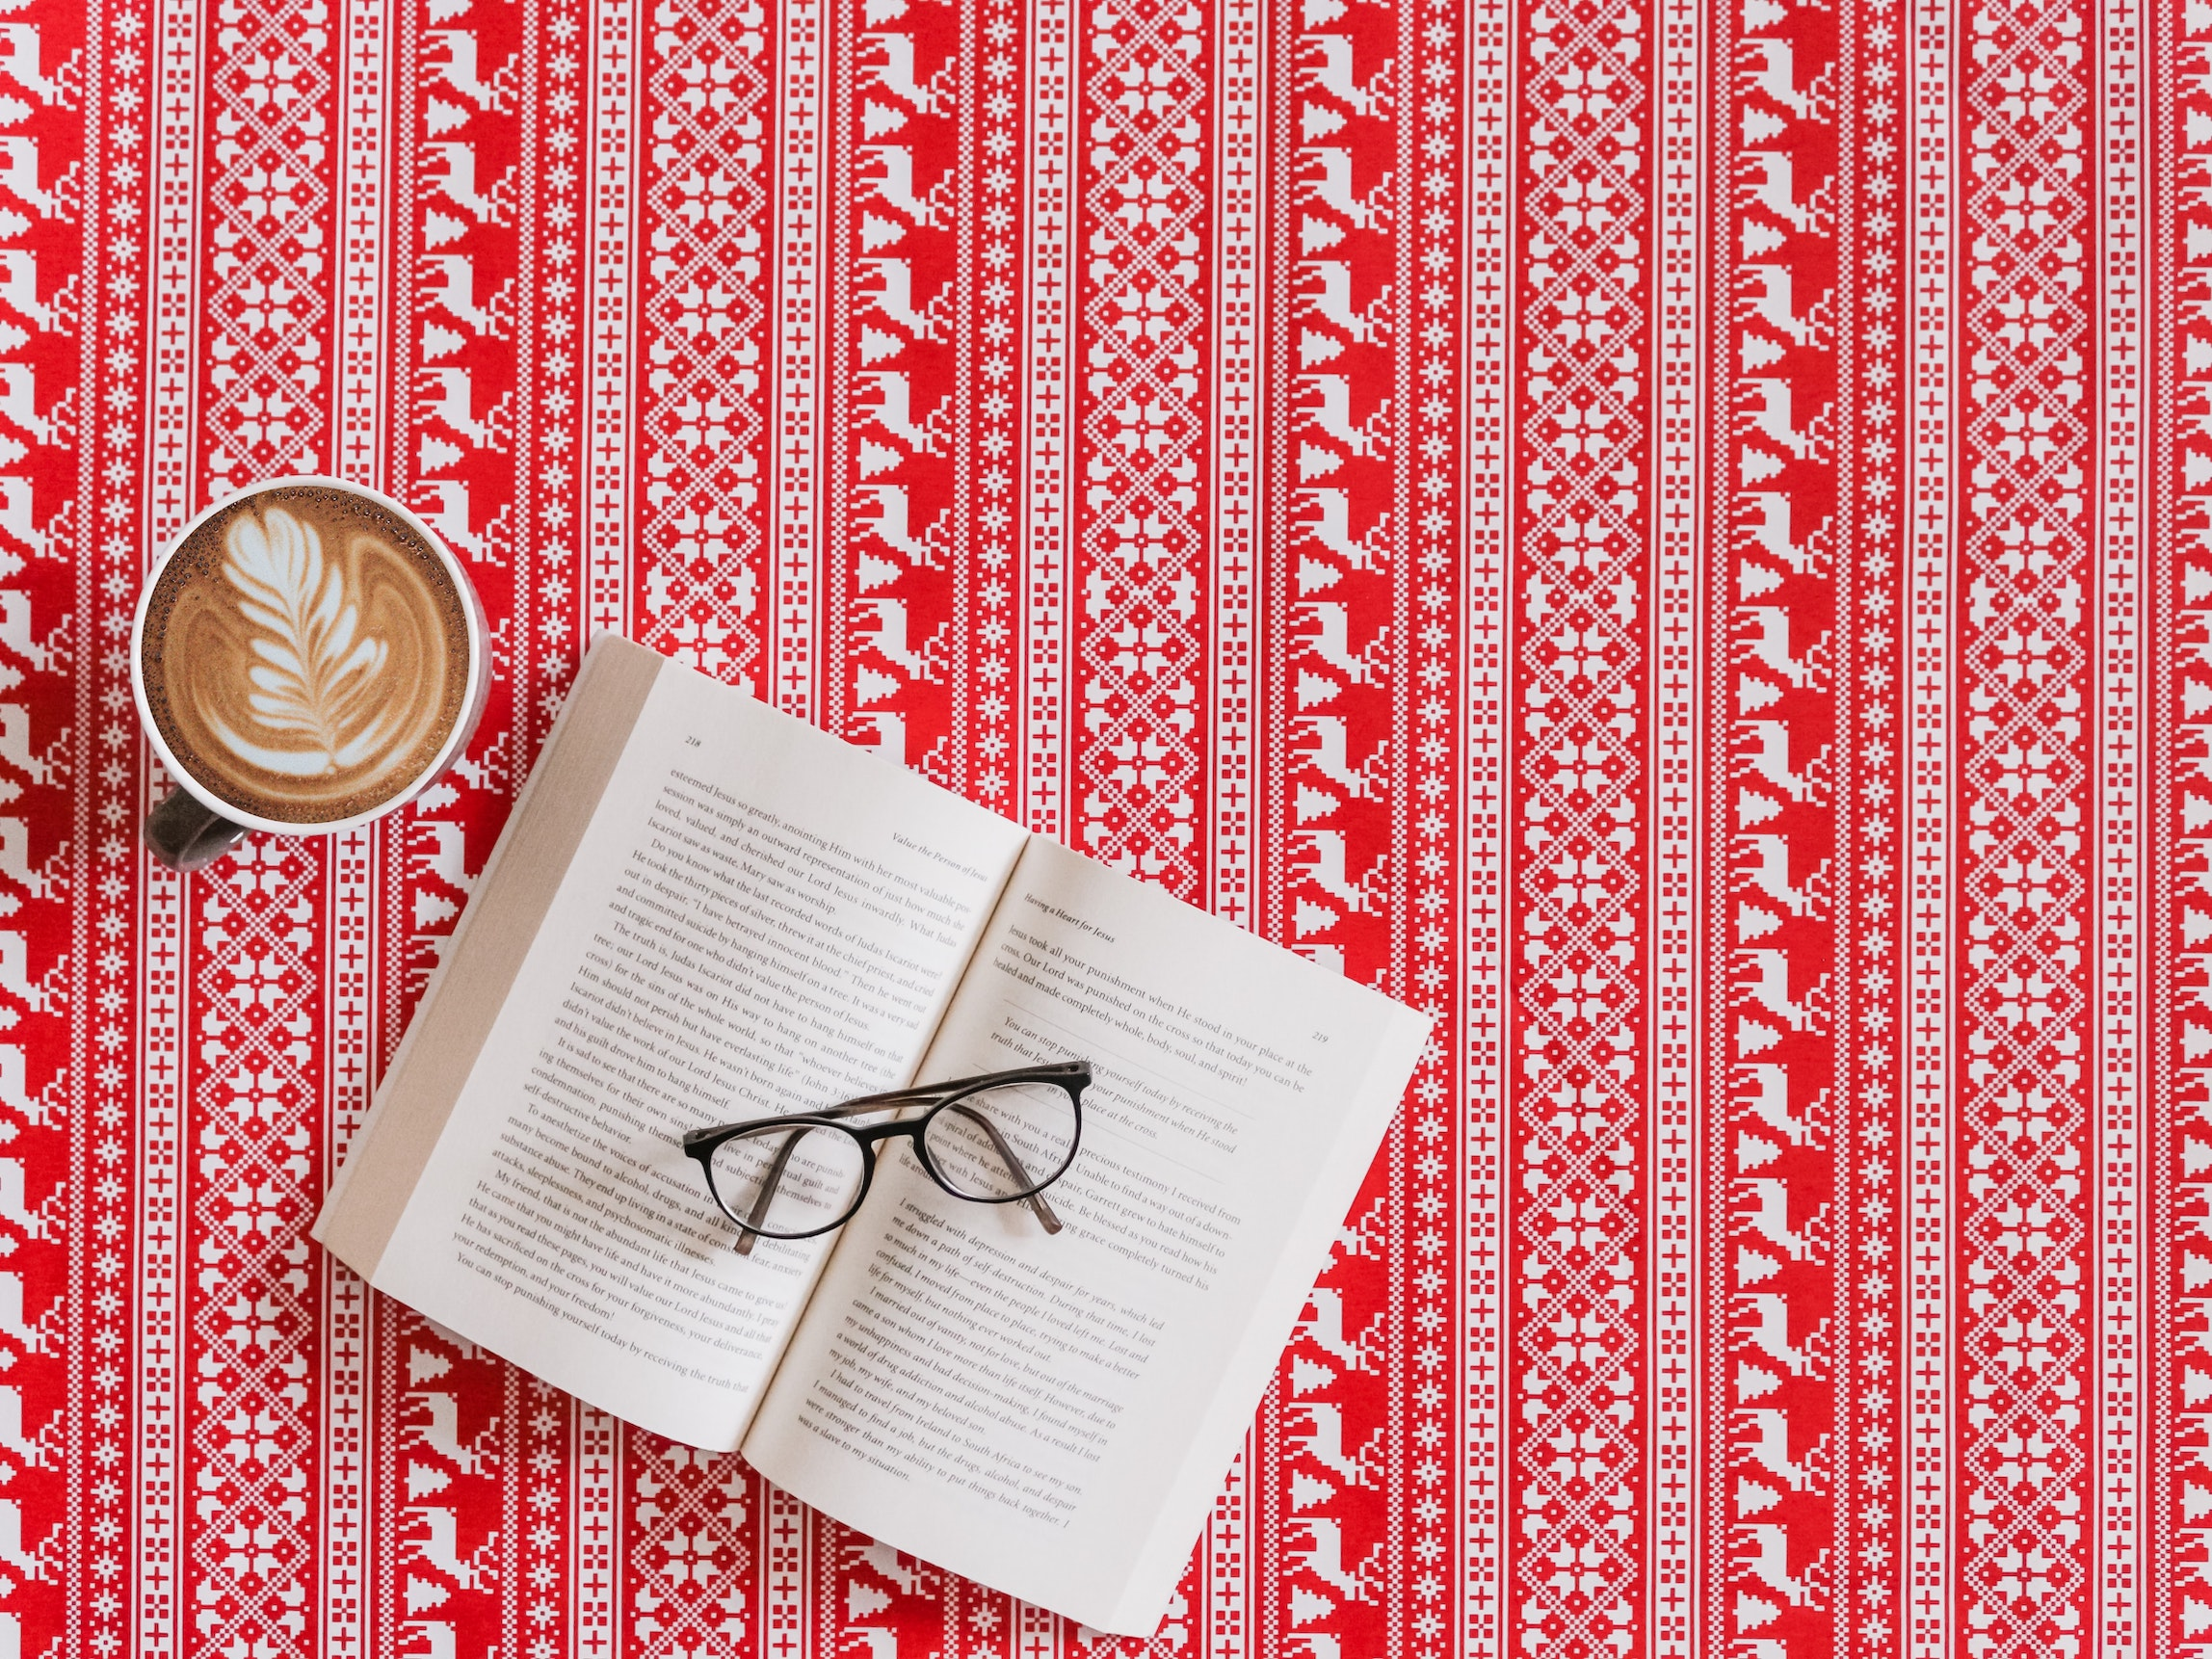

## A (flexible) agenda

| Time | Action |
|-----------|---------------|
| **8:45 - 8:55**	| Presentation about the topic – Create teams |
| **8:55 - 9:25**  | Teams go to their respective channels and work on the notebook |
| **9:25 - 9:40** | All teams go back to main room. Intra team experience sharing<br/><br/>•	What’s the biggest challenge in this learning process?<br/>•	What are the main takeaways?<br/>•	How can you use it in your daily work? |
| **9:40 - 9:45**  | We would love to hear your feedback! |

## Let's create some random teams!

In [ ]:
import random
import numpy as np

atendees = np.array(['Pepe1', 'Pepe2', 'Pepe3', 'Pepe4',
                     'Pepe5', 'Pepe6', 'Pepe7', 'Pepe8'])

team_names = ['BISCUITS',
              'CEREALS',
              'COOKIES',
              'CREPES',
              'CROISSANTS',
              'FRUITS',
              'ICECREAMS',
              'MUFFINS',
              'PANCAKES',
              'WAFFLES',
              ] 

people_per_team = 5
number_teams = np.ceil(len(atendees) / people_per_team)

random.shuffle(team_names)
random.shuffle(atendees)
attendees_to_teams = range(len(atendees)) % number_teams

for i in range(int(number_teams)):
  print(f'TEAM {team_names[i]}')
  print('-' * len(f'TEAM {team_names[i]}'))
  print(*atendees[attendees_to_teams == i], sep='\n')
  print()

TEAM CROISSANTS
---------------
Pepe1
Pepe7
Pepe5
Pepe2

TEAM COOKIES
------------
Pepe4
Pepe8
Pepe6
Pepe3



##### If you will ever need help, just type 'Help'. We will come to the room and help you.

**Best Python libraries for validating data:**

https://www.yeahhub.com/7-best-python-libraries-validating-data/

# Cerberus at hand!

In [ ]:
!pip install cerberus
!pip install Faker
!pip install schema
!pip install nbgrader
!pip install pygooglenews

In [ ]:
# Import the Validator class from Cerberus package
from cerberus import Validator

Cerberus is a lightweight and extensible data validation library for Python:
https://github.com/pyeve/cerberus

The `Validator` class is the main object that will allow us to validate a document.

In [ ]:
v = Validator()

We will instantiate a Validator mainly in two ways:

- As above, by passing no parameter of the schema we want to validate:
```
v = Validator()
```
Then we can re-use the object for different schemas:
```
v.validate(document1, schema1)
v.validate(document2, schema2)
```

- By specifycing the schema we want to use:
```
v = Validator(schema)
```
or
```
v = Validator()
v.schema = schema
```
This is more handy if the same schema wants to be used for multiple documents
```
v.validate(document1)
v.validate(document2)
```

## Example 1: Type checking


### String & Integer validation


**Cerberus `types`**:
- The following is a first simple demonstration of Cerberus data validation package. With the `type` rule, we set the **expected data type** of a field.
- In our first example, we want to validate a **name** field; we expect it to be a `string` value.
- Next, we want to define a new variable that takes **integer** values. Thus, we set the **type** to `integer`.

**Cerberus `min` and `max` rules**:
- The `min` and `max` rules set the **minimum** and **maximum** values allowed for `integer`, `float` and `number` types.
- For `string` types, we can use **minlength** and **maxlength**.

We define the **schema**. It is a Python dictionary. 

We specify that the `name` field must be a string. Also, we define `age` and set a minimum value of **20**.

In [ ]:
schema = {'name': {'type': 'string'},
          'age':  {'type': 'integer', 'min': 20}}

In [ ]:
document = {'name': 'Charles Davis', 'age': 22}

In [ ]:
v.validate(document, schema)

True

### Any other type


Can be one of the following names:

| Type name | Python 3 type |
|-----------|---------------|
| `boolean` | `bool` |
| `binary` | `bytes`, `bytearray` |
| `date` | `datetime.date` |
| `datetime` | `datetime.datetime` |
| `dict` | `collections.abc.Mapping` |
| `float` | `float` |
| `integer` | `int` |
| `list` | `collections.abc.Sequence`, excl. `string` |
| `number` | `float`, `int`, excl. `bool` |
| `set` | `set` |
| `string` | `str` |

You can extend this list and support [custom types](https://docs.python-cerberus.org/en/stable/customize.html#new-types).

### A list of types can be used to allow different values

We allow `quotes` to be both `string` or `list`

In [ ]:
schema = {'quotes': {'type': ['string', 'list']}}

In [ ]:
document = {'quotes': 'Hello world!'}
v.validate(document, schema)

True

In [ ]:
document = {'quotes': ['Do not disturb my circles!', 'Heureka!']}
v.validate(document, schema)

True

We can go even further and specify an schema for the elements of a list/dict

In [ ]:
# In this case, we want all elements of a potential list to be strings
schema = {'quotes': {'type': ['string', 'list'], 'schema': {'type': 'string'}}}

In [ ]:
document = {'quotes': [1, 'Heureka!']}
v.validate(document, schema)

False

In [ ]:
# The errors attribute will let us know why the validation did not succeed
v.errors

{'quotes': [{0: ['must be of string type']}]}

## Example 2: Nulls handling

If `nullable = True` the field value is allowed to be None. The rule will be checked on every field, regardless it’s defined or not. The rule’s constraint defaults `False`.

In [ ]:
schema = {'name': {'type': 'string',
                   'nullable': True}}
document = {'name': None}

print(v.validate(document, schema))
print(v.errors)

True
{}


In [ ]:
# nullable = False is the default behaviour
schema = {'name': {'type': 'string',
                   'nullable': False}}
document = {'name': None}

print(v.validate(document, schema))
print(v.errors)

False
{'name': ['null value not allowed']}


In a similar way we can detect empty values

In [ ]:
schema = {'name': {'type': 'string',
                   'empty': False}}
document = {'name': ''}

print(v.validate(document, schema))
print(v.errors)

False
{'name': ['empty values not allowed']}


Again as we saw in the Example 1, we can make use of the parameter `schema` to apply these rules to all values withing a list/dict

In [ ]:
schema = {'name': {'nullable': True,
                   'schema': {'nullable': False,
                              'empty': False}}}
document = {'name': ["Joan", "Antonio", None, "Sara", ""]}

print(v.validate(document, schema))
print(v.errors)

False
{'name': [{2: ['null value not allowed'], 4: ['empty values not allowed']}]}


## Example 3: Allowing the Unknown

By default **only keys defined** in the schema are **allowed**.

However, you can *allow unknown* document **keys pairs** by either setting `allow_unknown` to `True`

In [ ]:
schema = {'name': {'type': 'string'},
          'age':  {'type': 'integer', 'min': 20}}

In [ ]:
v.validate({'name': 'John', 'sex': 'M'})

False

In [ ]:
#v.schema = {}
v.allow_unknown = True

In [ ]:
v.validate({'name': 'John', 'sex': 'M'})

True

## Example 4: Contains, allowed and forbidden

- **contains**: This rule validates that the a container object contains **all** of the defined items.

In [ ]:
document = {'foo': ['breakfast', 'lunch', 'dinner']}

In [ ]:
schema = {'foo': {'contains': 'breakfast'}}
v.validate(document, schema)

True

In [ ]:
schema = {'foo': {'contains': ['breakfast', 'lunch']}}
v.validate(document, schema)

True

In [ ]:
schema = {'foo': {'contains': 'snack'}}
v.validate(document, schema)

False

In [ ]:
v.errors

{'foo': ["missing members {'snack'}"]}

- **allowed**: Validates the target value if the value is in the allowed values. If the target value is an iterable, all its members must be in the allowed values.

In [ ]:
schema = {'foo': {'allowed': ['breakfast', 'lunch', 'dinner']}}
v.validate(document, schema)

True

In [ ]:
schema = {'foo': {'allowed': ['breakfast', 'lunch']}}
v.validate(document, schema)

False

In [ ]:
v.errors

{'foo': ["unallowed values ['dinner']"]}

- **forbidden**: Opposite to allowed this validates if a value is any but one of the defined values.


In [ ]:
schema = {'foo': {'forbidden': ['snack']}}
v.validate(document, schema)

True

In [ ]:
schema = {'foo': {'forbidden': ['breakfast']}}
v.validate(document, schema)

False

In [ ]:
v.errors

{'foo': ["unallowed values ['breakfast']"]}

- We can combine all them in a same validation

In [ ]:
schema = {'foo': {'contains': ['breakfast'],
                  'forbidden': ['snack']}}
v.validate(document, schema)

True

## Example 5: User defined checks with check_with

Validates the value of a field by calling either a function or method.

A function must be implemented like the following prototype:

```
def functionnname(field, value, error):
    if value is invalid:
        error(field, 'error message')
```

The `error` argument points to the calling validator’s `_error` method. See [Extending Cerberus](https://docs.python-cerberus.org/en/stable/customize.html) on how to submit errors.

Here’s an example that tests whether an integer is odd or not:

In [ ]:
def oddity(field, value, error):
    if value % 2 == 0:
        error(field, "Must be an odd number")

Then, we can validate a value like this:

In [ ]:
schema = {'amount': {'type': 'integer',
                     'check_with': oddity}}

In [ ]:
document = {'amount': 9}
v.validate(document, schema)

True

In [ ]:
document = {'amount': 10}
v.validate(document, schema)

False

In [ ]:
v.errors

{'amount': ['Must be an odd number']}

## Example 6: Dependencies

*   This rule allows we to define a single field name and multiple field names with underlying dependencies




In [ ]:
# Field 2 will exist only with the pre-condition of existence of field 1
schema = {'field1': {'required': False}, 'field2': {'required': False, 'dependencies': 'field1'}}

document = {'field1': 7}
print(v.validate(document, schema))

document = {'field2': 7}
print(v.validate(document, schema))
print(v.errors)

True
False
{'field2': ["field 'field1' is required"]}


*   When multiple field names are defined as dependencies, all of these must be present in order for the target field to be validated.


In [ ]:
schema = {'field1': {'required': False}, 'field2': {'required': False},
         'field3': {'required': False, 'dependencies': ['field1', 'field2']}}
         
document = {'field1': 7, 'field2': 11, 'field3': 13}
print(v.validate(document, schema))

document = {'field2': 11, 'field3': 13}
print(v.validate(document, schema))

print(v.errors)

True
False
{'field3': ["field 'field1' is required"]}


## Example 7: RegEx patterns


**RegEx** = **Reg**ular **Ex**pressions: 
- https://docs.python.org/3/library/re.html

> **Metacharacters**:
- Metacharacters are characters with a special meaning:

| Character | Description                                                                  |
|-----------|------------------------------------------------------------------------------|
| []        | A set of characters                                                          |
| \         | Signals a special sequence (can also be used to escape   special characters) |
| .         | Any character (except newline character)                                     |
| ^         | Starts with                                                                  |
| $         | Ends with                                                                    |
| *         | Zero or more occurrences                                                     |
| +         | One or more occurrences                                                      |
| {}        | Exactly the specified number of occurrences                                  |
| \|        | Either or                                                                    |
| ()        | Capture and group                                                            |


> **Special Sequences**:
- A special sequence is a **`\`** followed by one of the characters in the list below, and has a special meaning:

| Character | Description                                                                                                                                                                                                       |
|-----------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| \A        | Returns a match if the specified characters are at the   beginning of the string                                                                                                                                  |
| \b        | Returns a match where the specified characters are at the   beginning or at the end of a word (the "r" in the beginning is making sure that the string is being treated as a "raw string")|
| \B        | Returns a match where the specified characters are present,   but NOT at the beginning (or at the end) of a word (the "r" in the beginning is making sure that the string is being treated as a "raw string") |
| \d        | Returns a match where the string contains digits (numbers   from 0-9)                                                                                                                                             |
| \D        | Returns a match where the string DOES NOT contain digits                                                                                                                                                          |
| \s        | Returns a match where the string contains a white space   character                                                                                                                                               |
| \S        | Returns a match where the string DOES NOT contain a white   space character                                                                                                                                       |
| \w        | Returns a match where the string contains any word   characters (characters from a to Z, digits from 0-9, and the underscore _   character)                                                                       |
| \W        | Returns a match where the string DOES NOT contain any word   characters                                                                                                                                           |
| \Z        | Returns a match if the specified characters are at the end   of the string                                                                                                                                        |

> **Sets:**
- A set of characters inside a pair of square brackets `[]` with a special meaning.

### Check Email validation using RegEx

The validation will fail if the field’s value does not match the provided regular expression. It is only tested on **string values**.

In [ ]:
schema = {
      'email': {
          'type': 'string',
          'regex': '^[a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+$'
      }
}

In [ ]:
document = {'email': 'john@example.com'}

In [ ]:
v = Validator(schema)

In [ ]:
v.validate(document, schema)

True

We can also put a specific message when validating the document against the schema:
- If the validation is `True`, then print **"Data is valid"**
- Otherwiese, when validation resolves to `False`, print **"Invalid data"**

In [ ]:
def doc_valid(doc):
  if v.validate(doc):
      print('Data is valid')
  else:
      print('Invalid data')

In [ ]:
doc_valid(document)

Data is valid


### Check another email

In [ ]:
document2 = {'email': 'john_at_example_dot_com'}

In [ ]:
print("Validating doc:", v.validate(document2, schema))
print("Errors:", v.errors)

Validating doc: False
Errors: {'email': ["value does not match regex '^[a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\\.[a-zA-Z0-9-.]+$'"]}


In [ ]:
doc_valid(document2)

Invalid data


# Challenge 1 - Customer KYC


##### ING retail is going through a credit reviewing process about its retail customers. More specifically, ING retail is interested to validate each customer's information with some predefined rules. The reviewing processed is performed in a way that only a group of customer who meets certain criteria will be reviewed.
---


##### As a data scientist, you have received a dataset which records the **demographic information** about customers.
---

##### Below is an overview about the datasset.

### Generate some synthetic data

In [ ]:
from faker import Faker 
import numpy as np


In [ ]:
Faker.seed(1234)
fake = Faker()
Faker.seed(1234)
import pandas as pd

In [ ]:
def create_data(x:int):

  data = []

  for i in range(0, x):
    data_i = {}
    data_i['name'] = fake.name()
    data_i['working_experience'] =  np.random.randint(1,30)
    data_i['city'] = fake.city()
    data_i['company'] = fake.company() + ' '+ fake.company_suffix()
    data_i['age'] =  np.random.randint(1,100)
    data_i['job'] = fake.job()
    data_i['address'] = fake.street_address()
    data.append(data_i)

  return data

In [ ]:
data = create_data(100)
df = pd.DataFrame.from_dict(data)
df.head(10)

,name,working_experience,city,company,age,job,address
0,Jessica Smith,8,Crosbystad,"Miller, Miranda and Young Inc",5,"Research officer, government",9721 Danny Bridge
1,Dr. Austin Weaver,2,New Christopher,Adams-Hawkins Group,51,Hydrologist,37808 Matthew Road
2,Carol Jones,19,North Jason,Reed Inc Group,78,Personal assistant,0242 Melanie Spur
3,Justin Duran,18,New Taylor,Fitzpatrick Ltd Group,44,Claims inspector/assessor,7441 Butler Springs Suite 176
4,Mary Davidson,24,New Lisa,Odonnell and Sons Inc,80,"Scientist, water quality",711 Brandon Glen Apt. 815
5,Joel Richards,7,Barkershire,Lee Ltd LLC,63,Data scientist,386 Breanna Greens Suite 827
6,Tiffany Kennedy,19,North Frederickland,Reeves-Jackson PLC,6,Applications developer,306 Mark Walk
7,Taylor Herman,23,New Kevin,Lane Inc Group,73,Publishing rights manager,9481 Hill Green
8,Jennifer Bailey,24,Hallport,Smith-Castillo and Sons,16,"Scientist, water quality",72495 Reed Drive Suite 977
9,Rebecca Swanson,9,Daleborough,"Brown, Taylor and Whitehead Group",66,Veterinary surgeon,495 Lynn Park Suite 418


### Exercise 1
- Define a schema using `name`, `age`, `working_experience` keys
- set the validation rule to be **minimum 2 years** and **maximum 20 years** of `working experience`. 
- set the validation rule of `age` to be **minimum 18**  years old and **maximum 65** years old. 
- Specify the dependancy rule of the `working_experience` depending on the `age` and `name` filed.
- For field with unspecified rules, what option could you select?
- Save the new schema using the following name: `schema2`
- Validate the data object, what's the proportion of data is valid?



> **document2:** 
- name = "Charles Davis"
- experience = 1

> **document3:** 
- name = "David Scott"
- experience = 7

In [ ]:
schema2 = {'name': {'type': 'string'},                              # Last Name & First Name
           'age': {'type': 'integer', 'min': 18, 'max': 65},
          'working_experience':  {'type': 'integer', 'min': 2, 'max': 30, 'dependencies': ['name', 'age']}}  # Years of experience}   

In [ ]:
v = Validator(schema2)

In [ ]:
v.allow_unknown = True

In [ ]:
cnt = 0
for record in data:
  if v.validate(record, schema2):
    cnt+=1
print(f'Proportion of valid data is {cnt/len(data)}%')

Proportion of valid data is 0.5%


### Exercise 2
- Add a customized `check_with` function to only allow customer with occupation ends with **engineer**, **ist** and **consultant**.
- Validate the data object, what's the proportion of data is valid?



In [ ]:
def occupation_check(field, value, error):
  if not value.endswith('engineer') and not value.endswith('ist'):
        error(field, "The occupation is invalid")

In [ ]:
schema3={}
schema3['job'] = {'type': 'string', 'check_with':occupation_check}

In [ ]:
v=Validator()
v.allow_unknown=True

In [ ]:
cnt = 0
for record in data:
  if v.validate(record, schema3):
    cnt+=1
print(f'Proportion of valid data is {cnt/len(data)}%')

Proportion of valid data is 0.16%


# Challenge 2 - Google news company name detection

#### One challenge that we have been facing in our day-to-day business is to preserve the confidentiality of the material non-public information. A specific requirement is to detect and mask our client company names. How could you help ING to facilitate this process using cerberus?

In [ ]:
from pygooglenews import GoogleNews
from collections import defaultdict
import json

In [ ]:
def get_news_headers(num_iter):
  news=[]
  keywords=['N.V.', 'NV', 'BV', 'B.V.', 'sports', 'culture', 'music', 'bank', 'finance']
  gn = GoogleNews(lang = 'en', country = 'UK')
  for word in keywords:
    for j in range(num_iter):
        business = gn.search(word)
        for i in business['entries']:
            tokens = i['title'].split('-')[0].split(' ')
            if len(tokens)>=5 and len([x for x in tokens if any([k in x for k in keywords])])>=1:
                news.append({'title': i['title'].split('-')[0]})
  return news

In [ ]:
# This takes around 3 mins
company_news = get_news_headers(5)

In [ ]:
# Save as a json object
with open('news.json', 'w') as fp:
    json.dump(company_news, fp)
company_news = json.load(open('news.json'))

In [ ]:
company_news[0]

{'title': 'Vivoryon Therapeutics N.V.: Vivoryon Therapeutics N.V. new Home Member State '}

Company news object has the key as company suffice and values as hearders. How can you detect company names using cerberus?
Hint: You use regex support within Ceberus.

In [ ]:
schema={}
schema['title'] = {'type': 'string', 'regex': '.+(([A-Z][a-zA-Z]+\s*){1,4})(NV|N.V.|B.V.|BV).+'}

In [ ]:
v=Validator()
v.validate(company_news[0], schema)

True

# If you managed to reach here before time, we are waiting you at the main room ;) 

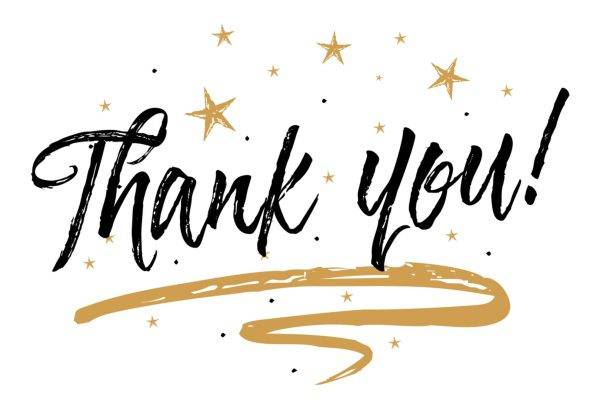